In [0]:
%pip install lightgbm
%pip install numpy==1.20
%pip install mlflow
%pip install datacompy

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Using cached numpy-1.20.0-cp39-cp39-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Not uninstalling numpy at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd7f37fb-7b0d-400a-ad6d-b8c50c83c366
    Can't uninstall 'numpy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restart

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pyspark.sql import functions as F
from pyspark.sql import types as T
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score 
import datacompy
import warnings
import time
import os
from urllib.parse import urlparse
from datetime import datetime
warnings.filterwarnings("ignore")
from lightgbm import  LGBMClassifier
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName( "pandas to spark").getOrCreate()

In [0]:
#Data Uploading
data_1= spark.sql("select * from cs_ai_training_data where SURVEY_TYPE=='2020H2'")
display(data_1)

SURVEY_TYPE,DAYS_SINCE_LAST_TP,TPS_TOTAL_6M,TPS_EMAIL_6M,TPS_WEBPAGE_6M,TPS_SF_OPPTY_6M,TPS_OTHER_6M,TICKET_COUNT,AVG_PICKUP_TIME,AVG_SLA_TTR,COUNT_REWORKTICKET_30DAYS,COUNT_CHRONICTICKET_30DAYS,REPEAT_TICKET_COUNT,TICKET_COUNT_OUTSIDE_SLA,CRITICAL_SEVERITY_COUNT,HIGH_SEVERITY_COUNT,LOW_SEVERITY_COUNT,MEDIUM_SEVERITY_COUNT,NO_RUSH_SEVERITY_COUNT,ON_SITE_TIME_SEVERITY_COUNT,OTHER_SEVERITY_COUNT,URGENT_SEVERITY_COUNT,CRITICAL_PRIORITY_COUNT,HIGH_PRIORITY_COUNT,IMPAIRED_PRIORITY_COUNT,LOW_PRIORITY_COUNT,MEDIUM_PRIORITY_COUNT,MINOR_PRIORITY_COUNT,OUT_OF_SERVICE_PRIORITY_COUNT,PRIORITY_3_PRIORITY_COUNT,PRIORITY_4_PRIORITY_COUNT,VCT_END_USER_PRIORITY_COUNT,NULL_ESCALATION_LEVEL_COUNT,ESCALATED_TO_1ST_ESCALATION_LEVEL_COUNT,ESCALATED_TO_2ND_ESCALATION_LEVEL_COUNT,ESCALATED_TO_3RD_ESCALATION_LEVEL_COUNT,ESCALATED_TO_4TH_ESCALATION_LEVEL_COUNT,ESCALATED_TO_5TH_ESCALATION_LEVEL_COUNT,AVG_DAYS_USAGE,AVG_DAYS_MRR,AVG_DAYS_OTHERS,AVG_RESOLUTION_DAYS,PERCENT_RESOLUTION_TIME_USED,AVG_PERCENT_BILLING_SLA_MET,BILLING_TICKET_VOLUME_ONE_YEAR,AVG_DAYS_TO_RESOLVE_CLOSED,PERCENT_RESOLUTION_TIME_USED_CLOSED,TOTAL_CREDITS_ISSUED_ONE_YEAR,TKT_COUNT_OPEN,TKT_COUNT_OPEN_UNASSIGNED,TKT_COUNT_OPEN_DEBIT_ADJ,TKT_COUNT_OPEN_DISPUTE,TKT_COUNT_OPEN_INQUIRY,TKT_COUNT_OPEN_PROACT,TKT_VALUE_OPEN,TKT_VALUE_OPEN_DEBIT_ADJ,TKT_VALUE_OPEN_DISPUTE,TKT_VALUE_OPEN_INQUIRY,TKT_VALUE_OPEN_PROACT,TKT_MOST_URGENT_DAYS_OPEN,TKT_MOST_URGENT_AMT,TKT_LARGEST_DAYS_OPEN,TKT_LARGEST_AMT,TOTAL_ORDERS,COUNT_CCD_MET,AVG_CCD_MET,SEGMENT_DERIVED,LTR_BUCKET
2020H2,585,194,24,1,1,171,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,122.0,94.31818182,4.9,1.204188482,1.1,11,4.9,0.204188482,5,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,83,83,2.0,9,1
2020H2,183,1,1,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,122.0,122.0,122.0,1.0,1.0,1.0,1,1.0,0.0,1,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,10,2
2020H2,611,7,1,1,1,7,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,87.5,6.0,59.0,4.052631579,2.0,2,59.0,3.052631579,2,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,1,0
2020H2,587,77,77,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,122.0,0.0,1.0,1.0,1.0,1,1.0,0.0,1,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,2,1
2020H2,601,14,14,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,122.0,0.0,1.0,1.0,1.0,2,1.0,0.0,1,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,2,1
2020H2,587,65,65,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,122.0,122.0,0.0,1.0,1.0,1.0,1,1.0,0.0,1,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,2,2
2020H2,585,688,110,486,1,94,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,122.0,97.6,6.333333333,1.0,1.0,4,6.333333333,0.0,2,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,2,2
2020H2,587,7,7,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,24.4,60.71428571,34.0,1.0,1.0,1.0,1,1.0,0.0,1,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,2,1,1.0,1,0
2020H2,607,16,8,1,1,9,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,61.0,122.0,99.25,2.0,1.045454545,1.0,2,2.0,0.045454545,2,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,0,0
2020H2,597,1169,6,1156,1,9,1,1.0,0.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,122.0,108.76,4.833333333,1.237113402,1.0,7,4.833333333,0.237113402,4,1,1,1,1,1,1,0.0,1,1.0,1.0,0.0,1,0.0,1,0.0,1,1,2.0,9,1


In [0]:
data_1_pd = data_1.toPandas()
train = data_1_pd.iloc[:3700,:]
test = data_1_pd.iloc[3700:,:]
print(train.shape[0],test.shape[0])

3700 1265


In [0]:
dbutils.widgets.removeAll()
dbutils.widgets.text("stats_threshold_limit","0.5")
dbutils.widgets.text("p_threshold","0.05")
dbutils.widgets.text("min_model_accuracy_threshold","0.5")


stats_threshold_limit=float(dbutils.widgets.get("stats_threshold_limit"))  #how much we should allow basic summary stat to shift
p_threshold=float(dbutils.widgets.get("p_threshold"))                      #the p_value below which to reject null hypothesis
min_model_Accuracy_threshold=float(dbutils.widgets.get("min_model_accuracy_threshold"))  #minimum model improvement

In [0]:
def create_lgb_pipeline(model_params,seed=42):
    
    #create pipeline component for numeric
    numeric_transformer= Pipeline(steps=[("imputer",SimpleImputer(strategy='median'))])
    
    #create pipeline component for categorical
    categorical_transformer= Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent')),("ohe",OneHotEncoder(handle_unknown='ignore'))])
    
    #combine numeric and cat in one processor
    preprocessor=ColumnTransformer(transformers=[('numeric',numeric_transformer,selector(dtype_exclude="category")),('categorical',categorical_transformer,selector(dtype_include="category"))])
        
    pipeline=Pipeline(steps=[("preprocessor",preprocessor),("lgb",LGBMClassifier(random_state=seed,**model_params))])
    
    return pipeline

In [0]:
def create_summary_stats_pdf(pdf):
    return pdf.describe()


def log_summary_stats_pdf_as_csv(summary_stats_pdf):
    return summary_stats_pdf.to_csv()
    

In [0]:
def train_lbg_model(run_name,model_params,data,misc_params,seed=42):
    
    with mlflow.start_run(run_name=run_name) as run:
        mlflow.autolog(log_input_examples=True,silent=True)
               
        #track misc params
        mlflow.log_dict(misc_params,"preprocessing_params.jason")
        target_col=misc_params['target_col']
        num_cols=misc_params['num_cols']
        cat_cols=misc_params['cat_cols']
        
        #load the table
        #convert data to pandas
        pdf=(data).toPandas()
        
        for c in cat_cols:
            pdf[c]=pdf[c].astype("category")
        
        #create summary stats
        summary_stats_pdf=create_summary_stats_pdf(pdf)
        log_summary_stats_pdf_as_csv(summary_stats_pdf)
        
        #Track number of total instances
        num_instances=pdf.shape[0]
        mlflow.log_param("num_instances",num_instances)
        mlflow.log_param("survey",misc_params['survey'])
        
        #split data
        X=pdf.drop([misc_params['target_col'],"SURVEY_TYPE"],axis=1)
        y=pdf[misc_params['target_col']]
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)
        
        #track_train_test_data
        num_training=X_train.shape[0]
        num_test=X_test.shape[0]
        mlflow.log_param("num_training",num_training)
        mlflow.log_param("num_test",num_test)
        
        #fit lbg pipeline
        
        lgb_pipeline=create_lgb_pipeline(model_params)
        lgb_model=lgb_pipeline.fit(X_train,y_train)
        
        
        mlflow.lightgbm.log_model(lgb_model,"model")
        
        #Evaluate the model
        predictions=lgb_model.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        f1score = f1_score(y_test,predictions,average='weighted')
        mlflow.log_metrics({'Accuracy':round(accuracy,2),'F1_Score':round(f1score,2)})

    return run     

In [0]:
# MODEL TRAINING

# set the survey type -used for naming the  mlflow run to track the paramteres
survey = 0
target_col = 'LTR_BUCKET'
cat_cols=['SEGMENT_DERIVED']
num_cols=data_1.drop('SURVEY_TYPE','LTR_BUCKET','SEGMENT_DERIVED').columns

# specify name of mlflow
run_name = f"suvrey_{survey}"

# define params to pass the lightgbm model
model_params = {
    "learning_rate": 0.1,
    "max_depth": 10,
    "min_child_samples": 20,
    "min_child_weight": 0.01,
    "n_estimators": 500,
    "n_jobs": 8,
    "num_leaves": 10,
}

#define dictionary of parameters that would like to during preprocessing
misc_params = {"survey":survey,
              "target_col":target_col,
              "cat_cols":cat_cols,
              "num_cols":num_cols}


In [0]:
#trigger model training and logging mlflow

survey_0_run = train_lbg_model(run_name,model_params,data_1,misc_params) 

In [0]:
### MLFLOW model registery

survey_0_run_id=survey_0_run.info.run_id

survey_0_model= mlflow.register_model(model_uri=f"runs:/{survey_0_run_id}/model",name="CS_AI_SURVEY_TYPE_2020H2")

time.sleep(10)
version=survey_0_model.version

Registered model 'CS_AI_SURVEY_TYPE_2020H2' already exists. Creating a new version of this model...
2023/01/31 07:19:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: CS_AI_SURVEY_TYPE_2020H2, version 3
Created version '3' of model 'CS_AI_SURVEY_TYPE_2020H2'.


In [0]:
## Transition model to staging and production
client=mlflow.tracking.MlflowClient()

client.transition_model_version_stage(name="CS_AI_SURVEY_TYPE_2020H2",version=version,stage="staging")


Out[10]: <ModelVersion: creation_timestamp=1675138517974, current_stage='Staging', description='', last_updated_timestamp=1675138534339, name='CS_AI_SURVEY_TYPE_2020H2', run_id='add72f884f084926bde76ce5eb20461b', run_link='', source='dbfs:/databricks/mlflow-tracking/1106781530545060/add72f884f084926bde76ce5eb20461b/artifacts/model', status='READY', status_message='', tags={}, user_id='7686480090724507', version='2'>

In [0]:
def create_summary_stats_pdf(pdf):  
    """Create a pandas DataFrame of summary statistics for a provided pandas DataFrame.
    Involved calling .describe on pandas DataFrame provided and additionally add  
    median values and a count of null values for each column. :
    param pdf: pandas DataFrame:
    return: pandas DataFrame of sumary statistics for each column"""  
    stats_pdf = pdf.describe(include="all")
                             
    # Add median values row\n  
    median_vals = pdf.median()  
    stats_pdf.loc["median"] = median_vals
    # Add null values row
    null_count = pdf.isna().sum()
    stats_pdf.loc["null_count"] = null_count 
    return stats_pdf

In [0]:
## old data
current_run_1=spark.sql("select * from cs_ai_training_data where SURVEY_TYPE=='2020H2'").toPandas()

current_stats_pdf_1=create_summary_stats_pdf(current_run_1.drop("SURVEY_TYPE",axis=1))

### New data arrives
survey_1_pdf= spark.sql("select * from cs_ai_training_data where SURVEY_TYPE=='2021H1'").toPandas()

summary_stats_survey_1_pdf=create_summary_stats_pdf(survey_1_pdf.drop("SURVEY_TYPE",axis=1))

In [0]:
# def check_null_proportion(new_df,threshold):
#     percent_missing = new_df.isnull().sum() / len(new_df)
#     missing_value_df = pd.DataFrame({'column_name': new_df.columns,
#                                  'percent_missing': percent_missing})
    
    
#     print("Checking proportion of nulls......")
#     for col in missing_value_df['column_name']:
#         if missing_value_df[missing_value_df['column_name']==col]['percent_missing'][0] > threshold:
#             print("Alert: There are Features that exceeds the expected null threshold")
#             print(col,missing_value_df[missing_value_df['column_name']==col]['percent_missing'])
#         else:
#             print("Features are not exceeds null threshold")
#             print(missing_value_df[missing_value_df['column_name']==col]['percent_missing'])
            
    

In [0]:
def check_null_proportions(new_pdf, null_proportion_threshold):  
    """
    Function to compute the proportions of nulls for all columns in Spark DataFrame and return any features that exceed the specified null threshold:
    param df:(pd.DataFrame) The dataframe that contains new incoming data :
    param null_proportion_threshold: (float) A numeric value ranging from 0 and 1 that specifies the tolerable fraction of nulls""" 
    
    missing_stats = pd.DataFrame(new_pdf.isnull().sum() / len(new_pdf)).transpose()  
    null_dict = {} 
    null_col_list = missing_stats.columns[(missing_stats >= null_proportion_threshold).iloc[0]]
   
    for feature in null_col_list:   
        null_dict[feature] = missing_stats[feature][0]  
    if len(null_dict) == 0:
            #assert len(null_dict) == 0
            print('No feature exceeds the threshold limit')
    else:
            print("Alert: There are feature(s) that exceed(s) the expected null threshold. Please ensure that the data is ingested correctly")    
    print(null_dict)

In [0]:
check_null_proportions(survey_1_pdf,null_proportion_threshold=0.00001)

No feature exceeds the threshold limit
{}


In [0]:
def check_diff_in_summary_stats(new_stats_pdf, prod_stats_pdf, num_cols, stats_threshold_limit, statistic_list):
    
    """ Function to check if the new summary stats significantly deviates from the summary stats in the production data by a certain threshold. :
  new_stats_pdf: (pd.DataFrame) summary statistics of incoming data  :param prod_stats_pdf: (pd.DataFrame) summary statistics of production data\n  
  param num_cols: (list) a list of numeric columns\n 
   :param stats_threshold_limit: (double) a float < 1 that signifies the threshold limit\n
 :param compare_stats_name: (string) can be one of mean, std, min, max\n  :param feature_diff_list: (list) an empty list to store the feature names with differences""" 
    
    feature_diff_list = []
    for feature in num_cols:
        print("\n CHECKING {feature}.........")
        for statistic in statistic_list:
            
            val = prod_stats_pdf[[str(feature)]].loc[str(statistic)][0]
            upper_val_limit = val * (1 + stats_threshold_limit)
            lower_val_limit = val * (1 - stats_threshold_limit)
            new_metric_value = new_stats_pdf[[str(feature)]].loc[str(statistic)][0]
            if new_metric_value < lower_val_limit:
                feature_diff_list.append(str(feature))
                print(f"The {statistic} {feature} in the new data is at least {stats_threshold_limit *100}% lower than the {statistic} in the production data. Decreased from {round(val, 2)} to {round(new_metric_value,2)}.")
            elif new_metric_value > upper_val_limit:
                feature_diff_list.append(str(feature))
                print(f"The {statistic} {feature} in the new data is at least {stats_threshold_limit *100}% higher than the {statistic} in the production data. Increased from {round(val, 2)} to {round(new_metric_value, 2)}.")
            else:
                pass
    return np.unique(feature_diff_list)

In [0]:
statistic_list=["mean","median","std","min","max"]
numeric_and_target_cols=data_1.drop('SURVEY_TYPE','SEGMENT_DERIVED').columns

unique_feature_diff_array_survey_1=check_diff_in_summary_stats(summary_stats_survey_1_pdf,current_stats_pdf_1, numeric_and_target_cols, stats_threshold_limit, statistic_list)


 CHECKING {feature}.........

 CHECKING {feature}.........
The median TPS_TOTAL_6M in the new data is at least 50.0% higher than the median in the production data. Increased from 45.0 to 72.0.

 CHECKING {feature}.........
The mean TPS_EMAIL_6M in the new data is at least 50.0% higher than the mean in the production data. Increased from 23.16 to 51.36.
The std TPS_EMAIL_6M in the new data is at least 50.0% higher than the std in the production data. Increased from 63.35 to 238.84.
The max TPS_EMAIL_6M in the new data is at least 50.0% higher than the max in the production data. Increased from 1384.0 to 10986.0.

 CHECKING {feature}.........
The median TPS_WEBPAGE_6M in the new data is at least 50.0% higher than the median in the production data. Increased from 2.0 to 12.0.

 CHECKING {feature}.........

 CHECKING {feature}.........

 CHECKING {feature}.........
The mean TICKET_COUNT in the new data is at least 50.0% higher than the mean in the production data. Increased from 1.06 to 1

In [0]:
#Distribution comparison between production data and new data
def plot_boxplots(unique_feature_diff_array, reference_pdf, new_pdf):
    """Distribution comparison between production data and new data"""
    sns.set_theme(style="whitegrid")  
    fig, ax = plt.subplots(len(unique_feature_diff_array), 2, figsize=(30,20)) 
    fig.suptitle("Distribution Comparisons between Incoming Data and Production Data")
    ax[0, 0].set_title("Production Data")  
    ax[0, 1].set_title("Incoming Data") 
    for i in range(len(unique_feature_diff_array)):   
        p1 = sns.boxplot(ax=ax[i, 0], x=reference_pdf[unique_feature_diff_array[i]])  
        p1.set_xlabel(str(unique_feature_diff_array[i]))    
        p1.annotate(str(unique_feature_diff_array[i]), xy=(30,20))  
        p2 = sns.boxplot(ax=ax[i, 1], x=new_pdf[unique_feature_diff_array[i]])   
        p2.annotate(str(unique_feature_diff_array[i]), xy=(30,20))

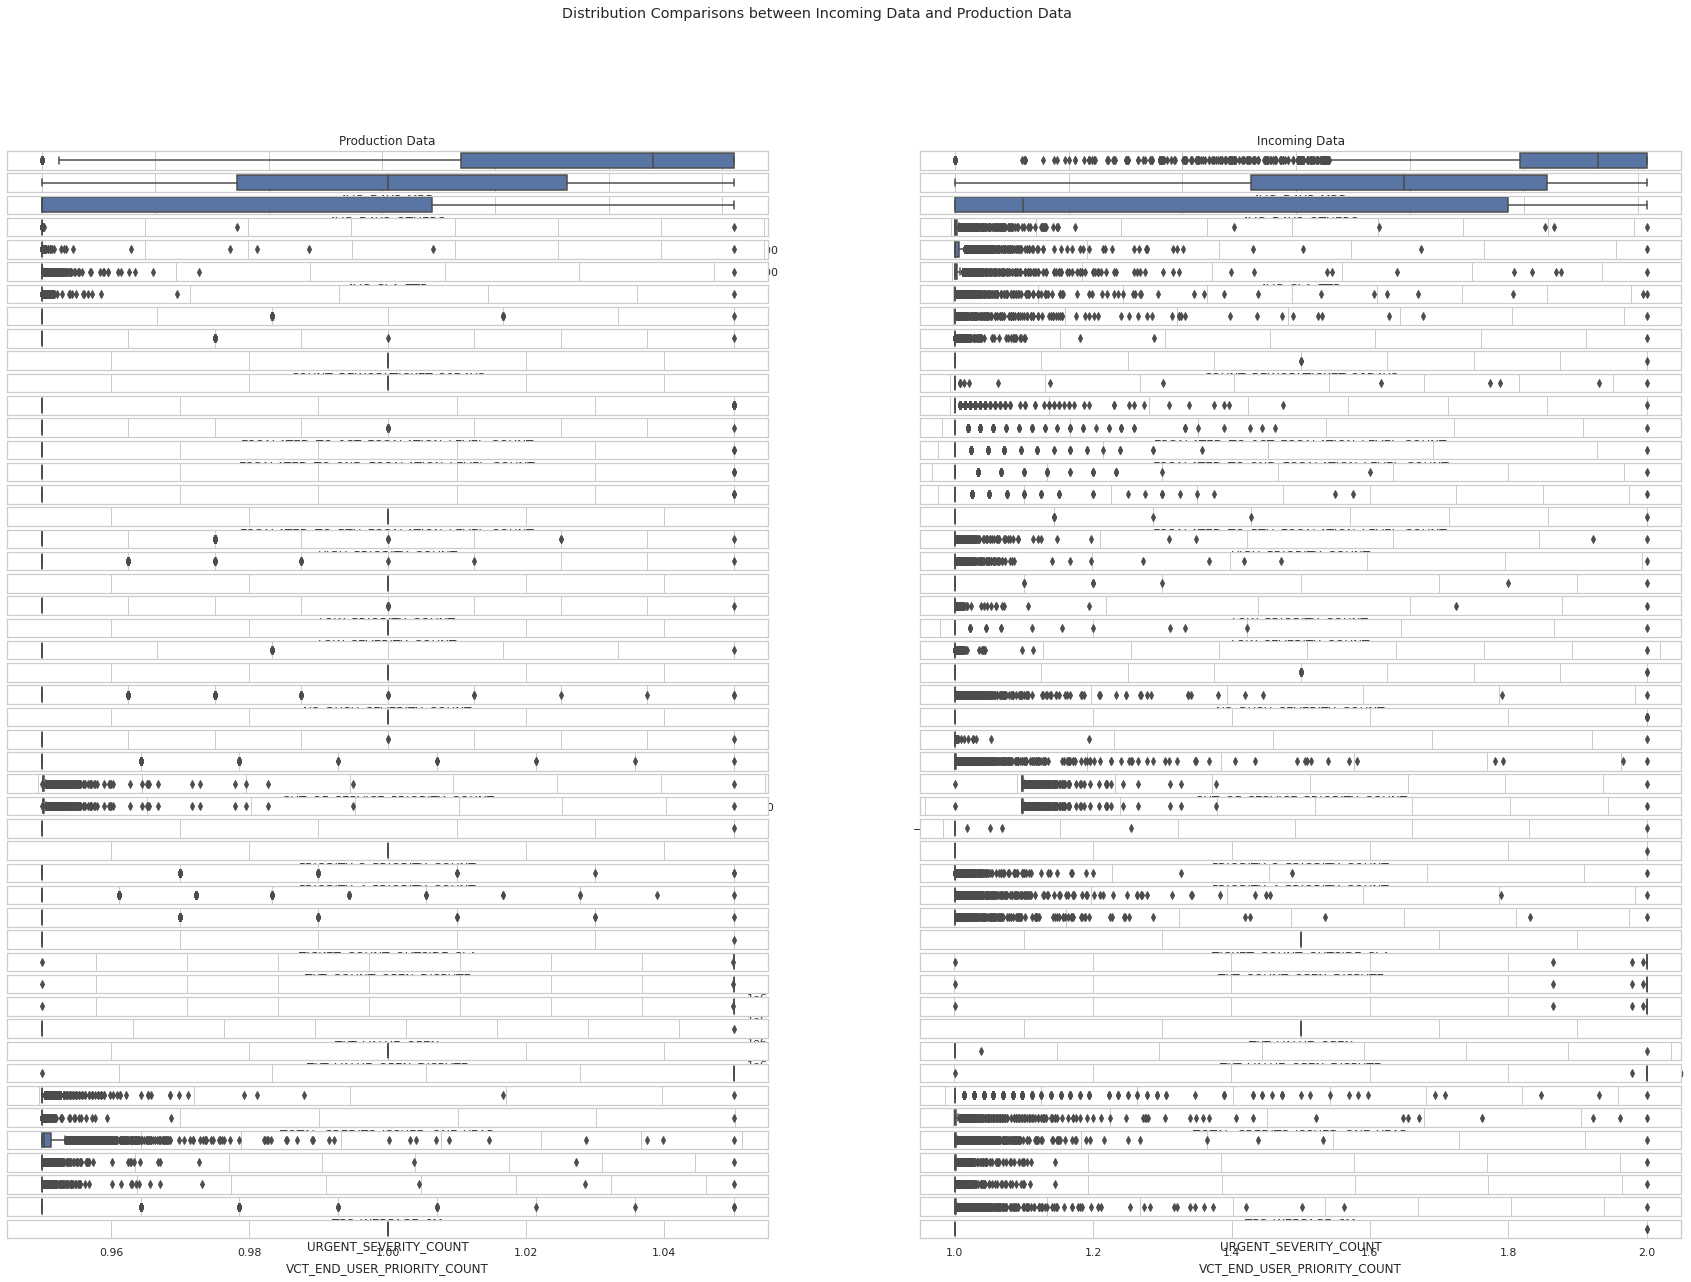

In [0]:
plot_boxplots(unique_feature_diff_array_survey_1, current_run_1, survey_1_pdf)

In [0]:
def check_diff_in_variances(reference_df, new_df, num_cols, p_threshold):
    """This function uses the Levene test to check if each column's variance in new_df is significantly different from reference_df
    From docs: The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.
    :param reference_df(pd.DataFrame): current dataframe in production  
    :param new_df (pd.DataFrame): new dataframe 
    :param num_cols (list): a list of numeric features
    ‘median’ : Recommended for skewed (non-normal) distributions.""" 
    var_dict = {}
    for feature in num_cols:
        levene_stat, levene_pval = scipy.stats.levene(reference_df[str(feature)], new_df[str(feature)], center="median")   
        if levene_pval <= p_threshold:     
            var_dict[str(feature)] = levene_pval  
            try:    
                assert len(var_dict) == 0  
                print(f"No features have significantly different variances compared to production data at p-value {p_threshold}")
            except:   
                print("The feature(s) below have significantly different variances compared to production data at p-value {p_threshold}")   
                print(var_dict)

In [0]:
print("n\CHECKING VARIENCES WITH LEVENE TEST.....")
check_diff_in_variances(current_run_1, survey_1_pdf,num_cols, p_threshold)

n\CHECKING VARIENCES WITH LEVENE TEST.....
The feature(s) below have significantly different variances compared to production data at p-value {p_threshold}
{'DAYS_SINCE_LAST_TP': 3.146754844972783e-40}
The feature(s) below have significantly different variances compared to production data at p-value {p_threshold}
{'DAYS_SINCE_LAST_TP': 3.146754844972783e-40, 'TPS_EMAIL_6M': 9.118867340540356e-16}
The feature(s) below have significantly different variances compared to production data at p-value {p_threshold}
{'DAYS_SINCE_LAST_TP': 3.146754844972783e-40, 'TPS_EMAIL_6M': 9.118867340540356e-16, 'TICKET_COUNT': 7.805300512968414e-25}
The feature(s) below have significantly different variances compared to production data at p-value {p_threshold}
{'DAYS_SINCE_LAST_TP': 3.146754844972783e-40, 'TPS_EMAIL_6M': 9.118867340540356e-16, 'TICKET_COUNT': 7.805300512968414e-25, 'COUNT_REWORKTICKET_30DAYS': 7.034333629824695e-06}
The feature(s) below have significantly different variances compared to pr

In [0]:
def check_dist_ks_bonferroni_test(reference_df, new_df, num_cols, p_threshold, ks_alternative="two-sided"):    
    """ Function to take two pandas DataFrames and compute the Kolmogorov-Smirnov statistic on 2 sample distributions    
    where the variable in question is continuous.    
    This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. 
    If the KS statistic is small or the p-value is high, then we cannot reject the hypothesis that    
    the distributions of the two samples are the same.\n    
    The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’.    
    This function assumes that the distributions to compare have the same column name in both DataFrames.    
        see more details here: https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test   
            :param reference_df: pandas DataFrame containing column with the distribution to be compared    
            :param new_df: pandas DataFrame containing column with the distribution to be compared   
            :param col_name: (str) Name of colummn to use as variable to create numpy array for comparison    
            :param ks_alternative: Defines the alternative hypothesis - ‘two-sided’ (default), ‘less’ or ‘greater’."""   
    ks_dict = {}  ### Bonferroni correction     
    corrected_alpha = p_threshold / len(num_cols)    
    print(f"The Bonferroni-corrected alpha level is {round(corrected_alpha, 4)}. Any features with KS statistic below this alpha level have shifted significantly.")   
    for feature in num_cols:
        ks_stat, ks_pval = scipy.stats.ks_2samp(reference_df[feature],new_df[feature],alternative=ks_alternative,mode="asymp")               
        if ks_pval <= corrected_alpha:       
            ks_dict[feature] = ks_pval    
            try:      
                assert len(ks_dict) == 0      
                print(f"No feature distributions has shifted according to the KS test at the Bonferroni-corrected alpha level of {round(corrected_alpha, 4)}.")    
            except:      
                print(f"The feature(s) below have significantly different distributions compared to production data at Bonferroni-corrected alpha level of {round(corrected_alpha, 4)}, according to the KS test")      
                print( ks_dict)

In [0]:
print("\n CHECKING KS TEST.....")
check_dist_ks_bonferroni_test(current_run_1, survey_1_pdf, num_cols, p_threshold, ks_alternative="two-sided")


 CHECKING KS TEST.....
The Bonferroni-corrected alpha level is 0.0008. Any features with KS statistic below this alpha level have shifted significantly.
The feature(s) below have significantly different distributions compared to production data at Bonferroni-corrected alpha level of 0.0008, according to the KS test
{'DAYS_SINCE_LAST_TP': 0.0}
The feature(s) below have significantly different distributions compared to production data at Bonferroni-corrected alpha level of 0.0008, according to the KS test
{'DAYS_SINCE_LAST_TP': 0.0, 'TPS_TOTAL_6M': 1.9785535566827114e-19}
The feature(s) below have significantly different distributions compared to production data at Bonferroni-corrected alpha level of 0.0008, according to the KS test
{'DAYS_SINCE_LAST_TP': 0.0, 'TPS_TOTAL_6M': 1.9785535566827114e-19, 'TPS_EMAIL_6M': 2.42610167359962e-14}
The feature(s) below have significantly different distributions compared to production data at Bonferroni-corrected alpha level of 0.0008, according to 

In [0]:
# MODEL TRAINING for new data

# set the survey type -used for naming the  mlflow run to track the paramteres
survey = 1
target_col = 'LTR_BUCKET'
cat_cols=['SEGMENT_DERIVED']
num_cols=data_1.drop('SURVEY_TYPE','LTR_BUCKET','SEGMENT_DERIVED').columns

# specify name of mlflow
run_name = f"suvrey_{survey}"

# define params to pass the lightgbm model
model_params = {
    "learning_rate": 0.1,
    "max_depth": 10,
    "min_child_samples": 20,
    "min_child_weight": 0.01,
    "n_estimators": 500,
    "n_jobs": 8,
    "num_leaves": 10,
}

#define dictionary of parameters that would like to during preprocessing
misc_params = {"survey":survey,
              "target_col":target_col,
              "cat_cols":cat_cols,
              "num_cols":num_cols}

#trigger model training and logging mlflow
data_2=spark.sql("select * from cs_ai_training_data where SURVEY_TYPE=='2021H1'")
survey_1_run = train_lbg_model(run_name,model_params,data_2,misc_params)

In [0]:
### MLFLOW model registery

survey_1_run_id=survey_1_run.info.run_id

survey_1_model= mlflow.register_model(model_uri=f"runs:/{survey_1_run_id}/model",name="CS_AI_SURVEY_TYPE_2021H1")

time.sleep(10)
version=survey_1_model.version

## Transition model to staging and production
client.transition_model_version_stage(name="CS_AI_SURVEY_TYPE_2021H1",version=version,stage="staging")


Registered model 'CS_AI_SURVEY_TYPE_2021H1' already exists. Creating a new version of this model...
2023/01/31 10:18:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: CS_AI_SURVEY_TYPE_2021H1, version 2
Created version '2' of model 'CS_AI_SURVEY_TYPE_2021H1'.
Out[228]: <ModelVersion: creation_timestamp=1675160285875, current_stage='Staging', description='', last_updated_timestamp=1675160302200, name='CS_AI_SURVEY_TYPE_2021H1', run_id='0cca8a9537254573aff3432be108f01a', run_link='', source='dbfs:/databricks/mlflow-tracking/1106781530545060/0cca8a9537254573aff3432be108f01a/artifacts/model', status='READY', status_message='', tags={}, user_id='7686480090724507', version='2'>

In [0]:
#model comparison btw current model and new prodduction model
current_prod_run = client.get_run(survey_0_run_id)
current_prod_run_mterics = current_prod_run.data.metrics['Accuracy']
print(current_prod_run_mterics)

current_staging_run=client.get_run(survey_1_run_id)
current_staging_mterics=current_staging_run.data.metrics['Accuracy']
print(current_staging_mterics)

0.63
0.58


In [0]:
def compare_model_perfs(current_staging_mteric,current_prod_run_mteric, min_model_perf_threshold):
    """This model compares the performances of the models in staging and in production.
    :Outputs: Recommendation to transition the staging model to production or not
    :param current_staging_run: MLflow run that contains information on the staging model
    :param current_prod_run: MLflow run that contains information on the production model
    :param min_model_perf_threshold (float): The minimum threshold that the staging model should exceed before being transitioned to production
    :param metric_to_check (string): The metric that the user is interested in using to compare model performances"""
    #print(current_staging_run)
    
    model_diff_fraction = current_staging_mteric / current_prod_run_mteric
    
    model_diff_percent = round((model_diff_fraction - 1)*100, 2)
    print(f"Staging run's {metric_to_check}: {round(current_staging_run.data.metrics[str(metric_to_check)],3)}")
    print(f"Current production run's {metric_to_check}: {round(current_prod_run.data.metrics[str(metric_to_check)],3)}")
     
    if model_diff_percent >= 0 and (model_diff_fraction - 1 >= min_model_perf_threshold):
        print(f"The current staging run exceeds the model improvement threshold of at least +{min_model_perf_threshold}. You may proceed with transitioning the staging model to production now")
    elif model_diff_percent >= 0 and (model_diff_fraction-1<min_model_perf_threshold):
        print(f"CAUTION: The current staging run does not meet the improvement threshold of at least +{min_model_perf_threshold}. Transition the staging model to production with caution.")
    else: 
        print(f"ALERT: The current staging run underperforms by {model_diff_percent} % when compared to the production model. Do not transition the staging model to production.")
    

In [0]:
compare_model_perfs(current_staging_mterics,current_prod_run_mterics, min_model_perf_threshold=0.5)

Staging run's Accuracy: 0.58
Current production run's Accuracy: 0.63
ALERT: The current staging run underperforms by -7.94% when compared to the production model. Do not transition the staging model to production.
